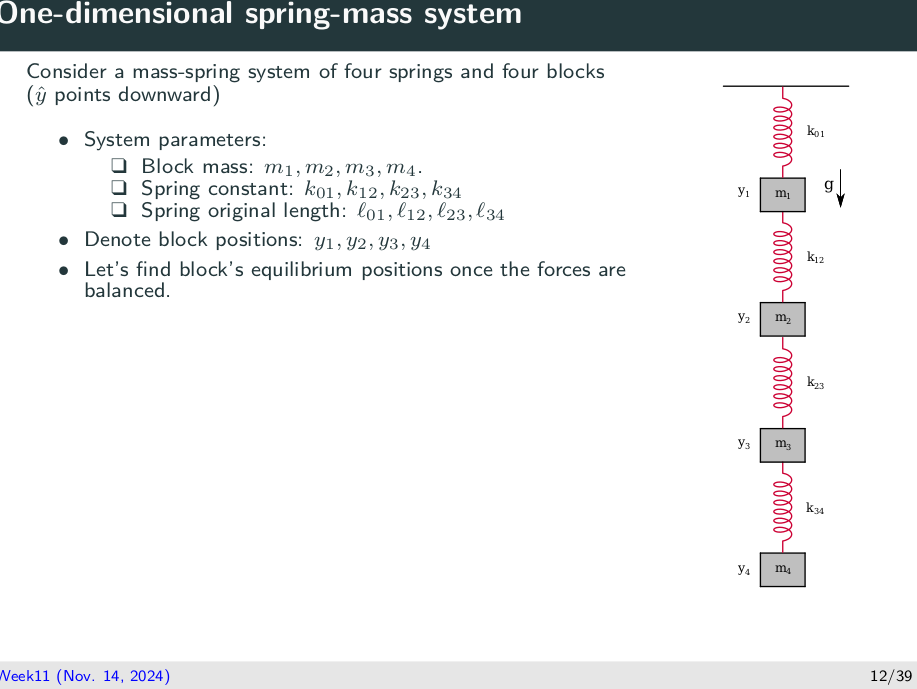

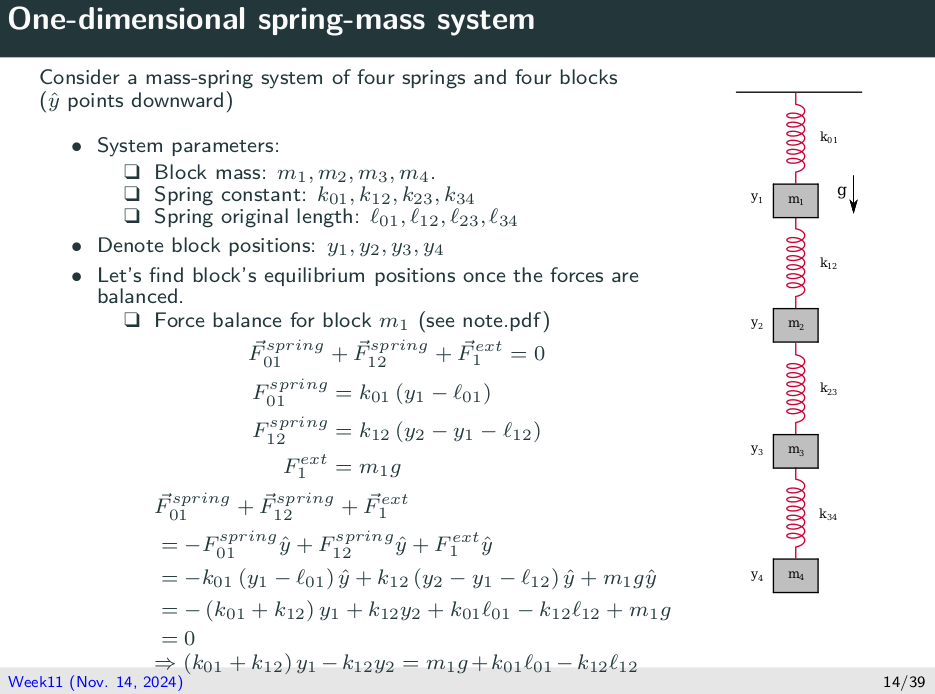

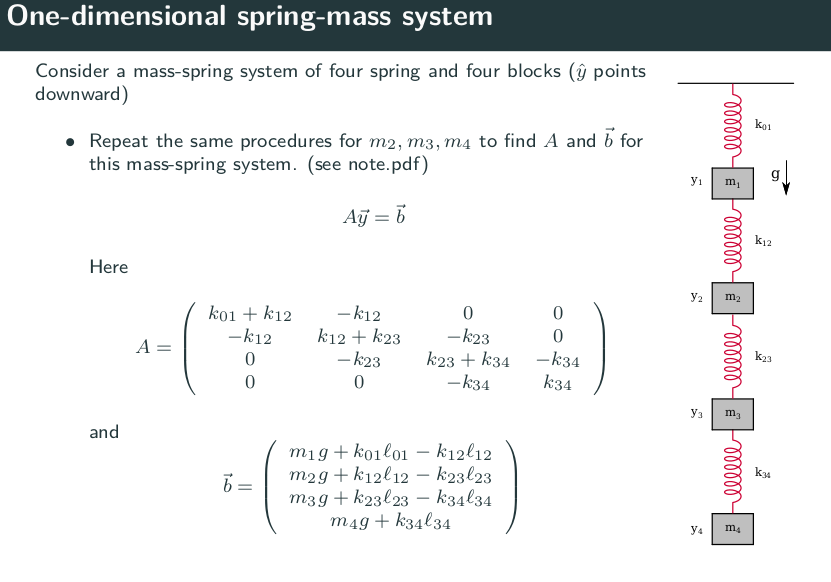

In [17]:
A = np.array([[k_01+k_12, -k_12, 0,  0.],
              [-k_12, k_12 + k_23, -k_23, 0.],
              [0., -k_23, k_23 + k_34, -k_34],
              [ 0., 0., -k_34, k_34]])

print (A)

#===b_vec
b1 = m1_g + k_01 * l_01 - k_12 * l_12
b2 = m2_g + k_12 * l_12 - k_23 * l_23
b3 = m3_g + k_23 * l_23 - k_34 * l_34
b4 = m4_g + k_34 * l_34 

NameError: name 'k_01' is not defined

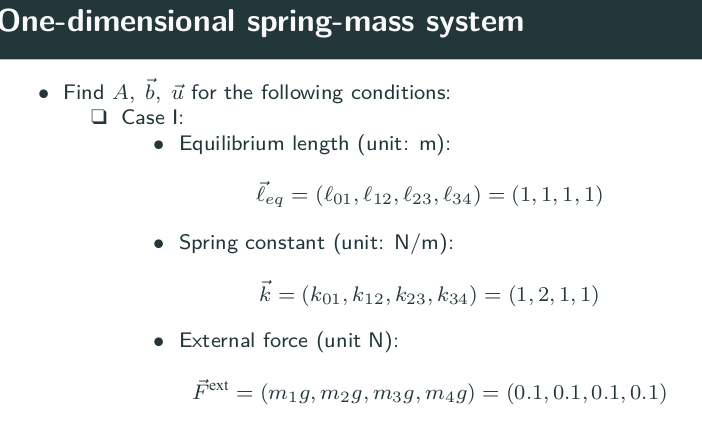

In [21]:
import numpy as np
#==== Springs ===
k_01 = 1. #N/meter
k_12 = 2. #N/meter
k_23 = 1. #N/meter
k_34 = 1. #N/meter
#====
l_01 = 1. #meters
l_12 = 1. #meters
l_23 = 1. #meters
l_34 = 1. #meters
#====External Force ===
m1_g = 0.1 #N
m2_g = 0.1 #N
m3_g = 0.1 #N
m4_g = 0.1 #N

#====
A = np.array([[k_01+k_12, -k_12, 0,  0.],
              [-k_12, k_12 + k_23, -k_23, 0.],
              [0., -k_23, k_23 + k_34, -k_34],
              [ 0., 0., -k_34, k_34]])

print (A)

#===b_vec
b1 = m1_g + k_01 * l_01 - k_12 * l_12
b2 = m2_g + k_12 * l_12 - k_23 * l_23
b3 = m3_g + k_23 * l_23 - k_34 * l_34
b4 = m4_g + k_34 * l_34 
b_vec = np.array([b1, b2, b3, b4])
print (b_vec)


[[ 3. -2.  0.  0.]
 [-2.  3. -1.  0.]
 [ 0. -1.  2. -1.]
 [ 0.  0. -1.  1.]]
[-0.9  1.1  0.1  1.1]


In [ ]:



# Find y 
Sol = ??????
print ("Solution =", Sol)